# 02 - Introduction to Python for Data Analysis

by [Alejandro Correa Bahnsen](albahnsen.com/) and [Jesus Solano](https://github.com/jesugome)

version 1.4, January 2019

## Part of the class [Practical Machine Learning](https://github.com/albahnsen/PracticalMachineLearningClass)



This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Rick Muller](http://www.cs.sandia.gov/~rmuller/), Sandia National Laboratories

## Why Python?
Python is the programming language of choice for many scientists to a large degree because it offers a great deal of power to analyze and model scientific data with relatively little overhead in terms of learning, installation or development time. It is a language you can pick up in a weekend, and use for the rest of one's life.

The [Python Tutorial](http://docs.python.org/3/tutorial/) is a great place to start getting a feel for the language. To complement this material, I taught a [Python Short Course](http://www.wag.caltech.edu/home/rpm/python_course/) years ago to a group of computational chemists during a time that I was worried the field was moving too much in the direction of using canned software rather than developing one's own methods. I wanted to focus on what working scientists needed to be more productive: parsing output of other programs, building simple models, experimenting with object oriented programming, extending the language with C, and simple GUIs. 

I'm trying to do something very similar here, to cut to the chase and focus on what scientists need. In the last year or so, the [Jupyter Project](http://jupyter.org) has put together a notebook interface that I have found incredibly valuable. A large number of people have released very good IPython Notebooks that I have taken a huge amount of pleasure reading through. Some ones that I particularly like include:

* Rick Muller [A Crash Course in Python for Scientists](http://nbviewer.jupyter.org/gist/rpmuller/5920182)
* Rob Johansson's [excellent notebooks](http://jrjohansson.github.io/), including [Scientific Computing with Python](https://github.com/jrjohansson/scientific-python-lectures) and [Computational Quantum Physics with QuTiP](https://github.com/jrjohansson/qutip-lectures) lectures;
* [XKCD style graphs in matplotlib](http://nbviewer.ipython.org/url/jakevdp.github.com/downloads/notebooks/XKCD_plots.ipynb);
* [A collection of Notebooks for using IPython effectively](https://github.com/ipython/ipython/tree/master/examples/notebooks#a-collection-of-notebooks-for-using-ipython-effectively)
* [A gallery of interesting IPython Notebooks](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)

I find Jupyter notebooks an easy way both to get important work done in my everyday job, as well as to communicate what I've done, how I've done it, and why it matters to my coworkers. In the interest of putting more notebooks out into the wild for other people to use and enjoy, I thought I would try to recreate some of what I was trying to get across in the original Python Short Course, updated by 15 years of Python, Numpy, Scipy, Pandas, Matplotlib, and IPython development, as well as my own experience in using Python almost every day of this time.

## Why Python for Data Analysis?

- Python is great for scripting and applications.
- The `pandas` library offers imporved library support.
- Scraping, web APIs
- Strong High Performance Computation support
    - Load balanceing tasks
    - MPI, GPU
    - MapReduce
- Strong support for abstraction
    - Intel MKL
    - HDF5
- Environment

## But we already know R

...Which is better? Hard to answer

http://www.kdnuggets.com/2015/05/r-vs-python-data-science.html

http://www.kdnuggets.com/2015/03/the-grammar-data-science-python-vs-r.html

https://www.datacamp.com/community/tutorials/r-or-python-for-data-analysis

https://www.dataquest.io/blog/python-vs-r/

http://www.dataschool.io/python-or-r-for-data-science/

## What You Need to Install

There are two branches of current releases in Python: the older-syntax Python 2, and the newer-syntax Python 3. This schizophrenia is largely intentional: when it became clear that some non-backwards-compatible changes to the language were necessary, the Python dev-team decided to go through a five-year (or so) transition, during which the new language features would be introduced and the old language was still actively maintained, to make such a transition as easy as possible. 

Nonetheless, I'm going to write these notes with Python 3 in mind, since this is the version of the language that I use in my day-to-day job, and am most comfortable with. 

With this in mind, these notes assume you have a Python distribution that includes:

* [Python](http://www.python.org) version 3.5;
* [Numpy](http://www.numpy.org), the core numerical extensions for linear algebra and multidimensional arrays;
* [Scipy](http://www.scipy.org), additional libraries for scientific programming;
* [Matplotlib](http://matplotlib.sf.net), excellent plotting and graphing libraries;
* [IPython](http://ipython.org), with the additional libraries required for the notebook interface.
* [Pandas](http://pandas.pydata.org/), Python version of R dataframe
* [scikit-learn](http://scikit-learn.org), Machine learning library!

A good, easy to install option that supports Mac, Windows, and Linux, and that has all of these packages (and much more) is the [Anaconda](https://www.continuum.io/).

### Checking your installation

You can run the following code to check the versions of the packages on your system:

(in IPython notebook, press `shift` and `return` together to execute the contents of a cell)

In [1]:
import sys

print('Python version:', sys.version)

import IPython
print('IPython:', IPython.__version__)

import numpy
print('numpy:', numpy.__version__)

import scipy
print('scipy:', scipy.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)

import pandas
print('pandas:', pandas.__version__)

import sklearn
print('scikit-learn:', sklearn.__version__)

Python version: 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
IPython: 7.2.0
numpy: 1.15.4
scipy: 1.2.0
matplotlib: 3.0.2
pandas: 0.23.4
scikit-learn: 0.20.2


# I. Python Overview
This is a quick introduction to Python. There are lots of other places to learn the language more thoroughly. I have collected a list of useful links, including ones to other learning resources, at the end of this notebook. If you want a little more depth, [Python Tutorial](http://docs.python.org/2/tutorial/) is a great place to start, as is Zed Shaw's [Learn Python the Hard Way](http://learnpythonthehardway.org/book/).

The lessons that follow make use of the IPython notebooks. There's a good introduction to notebooks [in the IPython notebook documentation](http://ipython.org/notebook.html) that even has a [nice video](http://www.youtube.com/watch?v=H6dLGQw9yFQ#!) on how to use the notebooks. You should probably also flip through the [IPython tutorial](http://ipython.org/ipython-doc/dev/interactive/tutorial.html) in your copious free time.

Briefly, notebooks have code cells (that are generally followed by result cells) and text cells. The text cells are the stuff that you're reading now. The code cells start with "In []:" with some number generally in the brackets. If you put your cursor in the code cell and hit Shift-Enter, the code will run in the Python interpreter and the result will print out in the output cell. You can then change things around and see whether you understand what's going on. If you need to know more, see the [IPython notebook documentation](http://ipython.org/notebook.html) or the [IPython tutorial](http://ipython.org/ipython-doc/dev/interactive/tutorial.html).

## Using Python as a Calculator

Many of the things I used to use a calculator for, I now use Python for:

In [2]:
2+2

4

In [3]:
(50-5*6)/4

5.0

(If you're typing this into an IPython notebook, or otherwise using notebook file, you hit shift-Enter to evaluate a cell.)

In the last few lines, we have sped by a lot of things that we should stop for a moment and explore a little more fully. We've seen, however briefly, two different data types: **integers**, also known as *whole numbers* to the non-programming world, and **floating point numbers**, also known (incorrectly) as *decimal numbers* to the rest of the world.

We've also seen the first instance of an **import** statement. Python has a huge number of libraries included with the distribution. To keep things simple, most of these variables and functions are not accessible from a normal Python interactive session. Instead, you have to import the name. For example, there is a **math** module containing many useful functions. To access, say, the square root function, you can either first

    from math import sqrt

and then

In [4]:
sqrt(81)

NameError: name 'sqrt' is not defined

In [5]:
from math import sqrt
sqrt(81)

9.0

or you can simply import the math library itself

In [6]:
import math
math.sqrt(81)

9.0

You can define variables using the equals (=) sign:

In [7]:
radius = 20
pi = math.pi
area = pi * radius ** 2 
area

1256.6370614359173

You can name a variable *almost* anything you want. It needs to start with an alphabetical character or "\_", can contain alphanumeric charcters plus underscores ("\_"). Certain words, however, are reserved for the language:

    and, as, assert, break, class, continue, def, del, elif, else, except, 
    exec, finally, for, from, global, if, import, in, is, lambda, not, or,
    pass, print, raise, return, try, while, with, yield

Trying to define a variable using one of these will result in a syntax error:

In [8]:
return = 0

SyntaxError: invalid syntax (<ipython-input-8-c7a05f6eb55e>, line 1)

The [Python Tutorial](http://docs.python.org/2/tutorial/introduction.html#using-python-as-a-calculator) has more on using Python as an interactive shell. The [IPython tutorial](http://ipython.org/ipython-doc/dev/interactive/tutorial.html) makes a nice complement to this, since IPython has a much more sophisticated iteractive shell.

## Strings
Strings are lists of printable characters, and can be defined using either single quotes

In [9]:
'Hello, World!'

'Hello, World!'

or double quotes

In [10]:
"Hello, World!"

'Hello, World!'

Just like the other two data objects we're familiar with (ints and floats), you can assign a string to a variable

In [11]:
greeting = "Hello, World!"

The **print** statement is often used for printing character strings:

In [12]:
print(greeting)

Hello, World!


But it can also print data types other than strings:

In [13]:
print("The area is " + area)

TypeError: must be str, not float

In [14]:
print("The area is " + str(area))

The area is 1256.6370614359173


In the above snipped, the number 600 (stored in the variable "area") is converted into a string before being printed out.

You can use the + operator to concatenate strings together:

Don't forget the space between the strings, if you want one there. 

In [15]:
statement = "Hello, " + "World!"
print(statement)

Hello, World!


If you have a lot of words to concatenate together, there are other, more efficient ways to do this. But this is fine for linking a few strings together.

## Lists
Very often in a programming language, one wants to keep a group of similar items together. Python does this using a data type called **lists**.

In [16]:
days_of_the_week = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

You can access members of the list using the **index** of that item:

In [17]:
days_of_the_week[2]

'Tuesday'

Python lists, like C, but unlike Fortran, use 0 as the index of the first element of a list. Thus, in this example, the 0 element is "Sunday", 1 is "Monday", and so on. If you need to access the *n*th element from the end of the list, you can use a negative index. For example, the -1 element of a list is the last element:

In [18]:
days_of_the_week[-1]

'Saturday'

You can add additional items to the list using the .append() command:

In [19]:
languages = ["Fortran","C","C++"]
languages.append("Python")
print(languages)

['Fortran', 'C', 'C++', 'Python']


The **range()** command is a convenient way to make sequential lists of numbers:

In [20]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Note that range(n) starts at 0 and gives the sequential list of integers less than n. If you want to start at a different number, use range(start,stop)

In [21]:
list(range(2,8))

[2, 3, 4, 5, 6, 7]

The lists created above with range have a *step* of 1 between elements. You can also give a fixed step size via a third command:

In [22]:
evens = list(range(0,20,2))
evens

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [23]:
evens[3]

6

Lists do not have to hold the same data type. For example,

In [24]:
["Today",7,99.3,""]

['Today', 7, 99.3, '']

However, it's good (but not essential) to use lists for similar objects that are somehow logically connected. If you want to group different data types together into a composite data object, it's best to use **tuples**, which we will learn about below.

You can find out how long a list is using the **len()** command:

In [25]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



In [26]:
len(evens)

10

## Iteration, Indentation, and Blocks
One of the most useful things you can do with lists is to *iterate* through them, i.e. to go through each element one at a time. To do this in Python, we use the **for** statement:

In [27]:
for day in days_of_the_week:
    print(day)

Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday


This code snippet goes through each element of the list called **days_of_the_week** and assigns it to the variable **day**. It then executes everything in the indented block (in this case only one line of code, the print statement) using those variable assignments. When the program has gone through every element of the list, it exists the block.

(Almost) every programming language defines blocks of code in some way. In Fortran, one uses END statements (ENDDO, ENDIF, etc.) to define code blocks. In C, C++, and Perl, one uses curly braces {} to define these blocks.

Python uses a colon (":"), followed by indentation level to define code blocks. Everything at a higher level of indentation is taken to be in the same block. In the above example the block was only a single line, but we could have had longer blocks as well:

In [28]:
for day in days_of_the_week:
    statement = "Today is " + day
    print(statement)

Today is Sunday
Today is Monday
Today is Tuesday
Today is Wednesday
Today is Thursday
Today is Friday
Today is Saturday


The **range()** command is particularly useful with the **for** statement to execute loops of a specified length:

In [29]:
for i in range(20):
    print("The square of ",i," is ",i*i)

The square of  0  is  0
The square of  1  is  1
The square of  2  is  4
The square of  3  is  9
The square of  4  is  16
The square of  5  is  25
The square of  6  is  36
The square of  7  is  49
The square of  8  is  64
The square of  9  is  81
The square of  10  is  100
The square of  11  is  121
The square of  12  is  144
The square of  13  is  169
The square of  14  is  196
The square of  15  is  225
The square of  16  is  256
The square of  17  is  289
The square of  18  is  324
The square of  19  is  361


## Slicing
Lists and strings have something in common that you might not suspect: they can both be treated as sequences. You already know that you can iterate through the elements of a list. You can also iterate through the letters in a string:

In [30]:
for letter in "Sunday":
    print(letter)

S
u
n
d
a
y


This is only occasionally useful. Slightly more useful is the *slicing* operation, which you can also use on any sequence. We already know that we can use *indexing* to get the first element of a list:

In [31]:
days_of_the_week[0]

'Sunday'

If we want the list containing the first two elements of a list, we can do this via

In [32]:
days_of_the_week[0:2]

['Sunday', 'Monday']

or simply

In [33]:
days_of_the_week[:2]

['Sunday', 'Monday']

If we want the last items of the list, we can do this with negative slicing:

In [34]:
days_of_the_week[-2:]

['Friday', 'Saturday']

which is somewhat logically consistent with negative indices accessing the last elements of the list.

You can do:

In [35]:
workdays = days_of_the_week[1:6]
print(workdays)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']


Since strings are sequences, you can also do this to them:

In [36]:
day = "Sunday"
abbreviation = day[:3]
print(abbreviation)

Sun


If we really want to get fancy, we can pass a third element into the slice, which specifies a step length (just like a third argument to the **range()** function specifies the step):

In [37]:
numbers = list(range(0,40))
evens = numbers[2::2]
evens

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]

Note that in this example I was even able to omit the second argument, so that the slice started at 2, went to the end of the list, and took every second element, to generate the list of even numbers less that 40.

## Booleans and Truth Testing
We have now learned a few data types. We have integers and floating point numbers, strings, and lists to contain them. We have also learned about lists, a container that can hold any data type. We have learned to print things out, and to iterate over items in lists. We will now learn about **boolean** variables that can be either True or False.

We invariably need some concept of *conditions* in programming to control branching behavior, to allow a program to react differently to different situations. If it's Monday, I'll go to work, but if it's Sunday, I'll sleep in. To do this in Python, we use a combination of **boolean** variables, which evaluate to either True or False, and **if** statements, that control branching based on boolean values.

For example:

In [38]:
if day == "Sunday":
    print("Sleep in")
else:
    print("Go to work")

Sleep in


(Quick quiz: why did the snippet print "Go to work" here? What is the variable "day" set to?)

Let's take the snippet apart to see what happened. First, note the statement

In [39]:
day == "Sunday"

True

If we evaluate it by itself, as we just did, we see that it returns a boolean value, False. The "==" operator performs *equality testing*. If the two items are equal, it returns True, otherwise it returns False. In this case, it is comparing two variables, the string "Sunday", and whatever is stored in the variable "day", which, in this case, is the other string "Saturday". Since the two strings are not equal to each other, the truth test has the false value.

The if statement that contains the truth test is followed by a code block (a colon followed by an indented block of code). If the boolean is true, it executes the code in that block. Since it is false in the above example, we don't see that code executed.

The first block of code is followed by an **else** statement, which is executed if nothing else in the above if statement is true. Since the value was false, this code is executed, which is why we see "Go to work".

You can compare any data types in Python:

In [40]:
1 == 2

False

In [41]:
50 == 2*25

True

In [42]:
3 < 3.14159

True

In [43]:
1 == 1.0

True

In [44]:
1 != 0

True

In [45]:
1 <= 2

True

In [46]:
1 >= 1

True

We see a few other boolean operators here, all of which which should be self-explanatory. Less than, equality, non-equality, and so on.

Particularly interesting is the 1 == 1.0 test, which is true, since even though the two objects are different data types (integer and floating point number), they have the same *value*. There is another boolean operator **is**, that tests whether two objects are the same object:

In [47]:
1 is 1.0

False

We can do boolean tests on lists as well:

In [48]:
[1,2,3] == [1,2,4]

False

In [49]:
[1,2,3] < [1,2,4]

True

Finally, note that you can also string multiple comparisons together, which can result in very intuitive tests:

In [50]:
hours = 5
0 < hours < 24

True

If statements can have **elif** parts ("else if"), in addition to if/else parts. For example:

In [51]:
if day == "Sunday":
    print("Sleep in")
elif day == "Saturday":
    print("Do chores")
else:
    print("Go to work")

Sleep in


Of course we can combine if statements with for loops, to make a snippet that is almost interesting:

In [52]:
for day in days_of_the_week:
    statement = "Today is " + day
    print(statement)
    if day == "Sunday":
        print("   Sleep in")
    elif day == "Saturday":
        print("   Do chores")
    else:
        print("   Go to work")

Today is Sunday
   Sleep in
Today is Monday
   Go to work
Today is Tuesday
   Go to work
Today is Wednesday
   Go to work
Today is Thursday
   Go to work
Today is Friday
   Go to work
Today is Saturday
   Do chores


This is something of an advanced topic, but ordinary data types have boolean values associated with them, and, indeed, in early versions of Python there was not a separate boolean object. Essentially, anything that was a 0 value (the integer or floating point 0, an empty string "", or an empty list []) was False, and everything else was true. You can see the boolean value of any data object using the **bool()** function.

In [53]:
bool(1)

True

In [54]:
bool(0)

False

In [55]:
bool(["This "," is "," a "," list"])

True

## Code Example: The Fibonacci Sequence
The [Fibonacci sequence](http://en.wikipedia.org/wiki/Fibonacci_number) is a sequence in math that starts with 0 and 1, and then each successive entry is the sum of the previous two. Thus, the sequence goes 0,1,1,2,3,5,8,13,21,34,55,89,...

A very common exercise in programming books is to compute the Fibonacci sequence up to some number **n**. First I'll show the code, then I'll discuss what it is doing.

In [56]:
n = 10
sequence = [0,1]
for i in range(2,n): # This is going to be a problem if we ever set n <= 2!
    sequence.append(sequence[i-1]+sequence[i-2])
print(sequence)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


Let's go through this line by line. First, we define the variable **n**, and set it to the integer 20. **n** is the length of the sequence we're going to form, and should probably have a better variable name. We then create a variable called **sequence**, and initialize it to the list with the integers 0 and 1 in it, the first two elements of the Fibonacci sequence. We have to create these elements "by hand", since the iterative part of the sequence requires two previous elements.

We then have a for loop over the list of integers from 2 (the next element of the list) to **n** (the length of the sequence). After the colon, we see a hash tag "#", and then a **comment** that if we had set **n** to some number less than 2 we would have a problem. Comments in Python start with #, and are good ways to make notes to yourself or to a user of your code explaining why you did what you did. Better than the comment here would be to test to make sure the value of **n** is valid, and to complain if it isn't; we'll try this later.

In the body of the loop, we append to the list an integer equal to the sum of the two previous elements of the list.

After exiting the loop (ending the indentation) we then print out the whole list. That's it!

## Functions
We might want to use the Fibonacci snippet with different sequence lengths. We could cut an paste the code into another cell, changing the value of **n**, but it's easier and more useful to make a function out of the code. We do this with the **def** statement in Python:

In [57]:
def fibonacci(sequence_length):
    "Return the Fibonacci sequence of length *sequence_length*"
    sequence = [0,1]
    if sequence_length < 1:
        print("Fibonacci sequence only defined for length 1 or greater")
        return
    if 0 < sequence_length < 3:
        return sequence[:sequence_length]
    for i in range(2,sequence_length): 
        sequence.append(sequence[i-1]+sequence[i-2])
    return sequence

We can now call **fibonacci()** for different sequence_lengths:

In [58]:
fibonacci(2)

[0, 1]

In [59]:
fibonacci(12)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

We've introduced a several new features here. First, note that the function itself is defined as a code block (a colon followed by an indented block). This is the standard way that Python delimits things. Next, note that the first line of the function is a single string. This is called a **docstring**, and is a special kind of comment that is often available to people using the function through the python command line:

In [60]:
help(fibonacci)

Help on function fibonacci in module __main__:

fibonacci(sequence_length)
    Return the Fibonacci sequence of length *sequence_length*



If you define a docstring for all of your functions, it makes it easier for other people to use them, since they can get help on the arguments and return values of the function.

Next, note that rather than putting a comment in about what input values lead to errors, we have some testing of these values, followed by a warning if the value is invalid, and some conditional code to handle special cases.

## Two More Data Structures: Tuples and Dictionaries
Before we end the Python overview, I wanted to touch on two more data structures that are very useful (and thus very common) in Python programs.

A **tuple** is a sequence object like a list or a string. It's constructed by grouping a sequence of objects together with commas, either without brackets, or with parentheses:

In [61]:
t = (1,2,'hi',9.0)
t

(1, 2, 'hi', 9.0)

Tuples are like lists, in that you can access the elements using indices:

In [62]:
t[1]

2

However, tuples are *immutable*, you can't append to them or change the elements of them:

In [63]:
t.append(7)

AttributeError: 'tuple' object has no attribute 'append'

In [64]:
t[1]=77

TypeError: 'tuple' object does not support item assignment

Tuples are useful anytime you want to group different pieces of data together in an object, but don't want to create a full-fledged class (see below) for them. For example, let's say you want the Cartesian coordinates of some objects in your program. Tuples are a good way to do this:

In [65]:
('Bob',0.0,21.0)

('Bob', 0.0, 21.0)

Again, it's not a necessary distinction, but one way to distinguish tuples and lists is that tuples are a collection of different things, here a name, and x and y coordinates, whereas a list is a collection of similar things, like if we wanted a list of those coordinates:

In [66]:
positions = [
             ('Bob',0.0,21.0),
             ('Cat',2.5,13.1),
             ('Dog',33.0,1.2)
             ]

Tuples can be used when functions return more than one value. Say we wanted to compute the smallest x- and y-coordinates of the above list of objects. We could write:

In [67]:
def minmax(objects):
    minx = 1e20 # These are set to really big numbers
    miny = 1e20
    for obj in objects:
        name,x,y = obj
        if x < minx: 
            minx = x
        if y < miny:
            miny = y
    return minx,miny

x,y = minmax(positions)
print(x,y)

0.0 1.2


**Dictionaries** are an object called "mappings" or "associative arrays" in other languages. Whereas a list associates an integer index with a set of objects:

In [68]:
mylist = [1,2,9,21]

The index in a dictionary is called the *key*, and the corresponding dictionary entry is the *value*. A dictionary can use (almost) anything as the key. Whereas lists are formed with square brackets [], dictionaries use curly brackets {}:

In [69]:
ages = {"Rick": 46, "Bob": 86, "Fred": 21}
print("Rick's age is ",ages["Rick"])

Rick's age is  46


There's also a convenient way to create dictionaries without having to quote the keys.

In [70]:
dict(Rick=46,Bob=86,Fred=20)

{'Rick': 46, 'Bob': 86, 'Fred': 20}

The **len()** command works on both tuples and dictionaries:

In [71]:
len(t)

4

In [72]:
len(ages)

3

## Conclusion of the Python Overview
There is, of course, much more to the language than I've covered here. I've tried to keep this brief enough so that you can jump in and start using Python to simplify your life and work. My own experience in learning new things is that the information doesn't "stick" unless you try and use it for something in real life.

You will no doubt need to learn more as you go. I've listed several other good references, including the [Python Tutorial](http://docs.python.org/2/tutorial/) and [Learn Python the Hard Way](http://learnpythonthehardway.org/book/). Additionally, now is a good time to start familiarizing yourself with the [Python Documentation](http://docs.python.org/2.7/), and, in particular, the [Python Language Reference](http://docs.python.org/2.7/reference/index.html).

Tim Peters, one of the earliest and most prolific Python contributors, wrote the "Zen of Python", which can be accessed via the "import this" command:

In [73]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


No matter how experienced a programmer you are, these are words to meditate on.

# II. Numpy and Scipy

[Numpy](http://numpy.org) contains core routines for doing fast vector, matrix, and linear algebra-type operations in Python. [Scipy](http://scipy) contains additional routines for optimization, special functions, and so on. Both contain modules written in C and Fortran so that they're as fast as possible. Together, they give Python roughly the same capability that the [Matlab](http://www.mathworks.com/products/matlab/) program offers. (In fact, if you're an experienced Matlab user, there a [guide to Numpy for Matlab users](http://www.scipy.org/NumPy_for_Matlab_Users) just for you.)

## Making vectors and matrices
Fundamental to both Numpy and Scipy is the ability to work with vectors and matrices. You can create vectors from lists using the **array** command:

In [74]:
import numpy as np
import scipy as sp

In [75]:
array = np.array([1,2,3,4,5,6])
array

array([1, 2, 3, 4, 5, 6])

size of the array

In [76]:
array.shape

(6,)

To build matrices, you can either use the array command with lists of lists:

In [77]:
mat = np.array([[0,1],[1,0]])
mat

array([[0, 1],
       [1, 0]])

Add a column of ones to mat

In [78]:
mat2 = np.c_[mat, np.ones(2)]
mat2

array([[0., 1., 1.],
       [1., 0., 1.]])

size of a matrix

In [79]:
mat2.shape

(2, 3)

You can also form empty (zero) matrices of arbitrary shape (including vectors, which Numpy treats as vectors with one row), using the **zeros** command:

In [80]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

There's also an **identity** command that behaves as you'd expect:

In [81]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

as well as a **ones** command.

## Linspace, matrix functions, and plotting
The **linspace** command makes a linear array of points from a starting to an ending value.

In [82]:
np.linspace(0,1)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

If you provide a third argument, it takes that as the number of points in the space. If you don't provide the argument, it gives a length 50 linear space.

In [83]:
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

**linspace** is an easy way to make coordinates for plotting. Functions in the numpy library (all of which are imported into IPython notebook) can act on an entire vector (or even a matrix) of points at once. Thus,

In [84]:
x = np.linspace(0,2*np.pi)
np.sin(x)

array([ 0.00000000e+00,  1.27877162e-01,  2.53654584e-01,  3.75267005e-01,
        4.90717552e-01,  5.98110530e-01,  6.95682551e-01,  7.81831482e-01,
        8.55142763e-01,  9.14412623e-01,  9.58667853e-01,  9.87181783e-01,
        9.99486216e-01,  9.95379113e-01,  9.74927912e-01,  9.38468422e-01,
        8.86599306e-01,  8.20172255e-01,  7.40277997e-01,  6.48228395e-01,
        5.45534901e-01,  4.33883739e-01,  3.15108218e-01,  1.91158629e-01,
        6.40702200e-02, -6.40702200e-02, -1.91158629e-01, -3.15108218e-01,
       -4.33883739e-01, -5.45534901e-01, -6.48228395e-01, -7.40277997e-01,
       -8.20172255e-01, -8.86599306e-01, -9.38468422e-01, -9.74927912e-01,
       -9.95379113e-01, -9.99486216e-01, -9.87181783e-01, -9.58667853e-01,
       -9.14412623e-01, -8.55142763e-01, -7.81831482e-01, -6.95682551e-01,
       -5.98110530e-01, -4.90717552e-01, -3.75267005e-01, -2.53654584e-01,
       -1.27877162e-01, -2.44929360e-16])

In conjunction with **matplotlib**, this is a nice way to plot things:

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

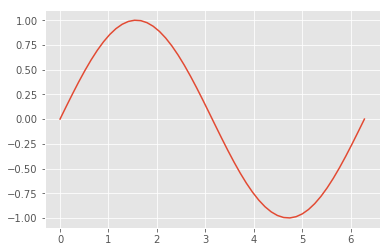

In [86]:
plt.plot(x,np.sin(x))

## Matrix operations
Matrix objects act sensibly when multiplied by scalars:

In [87]:
0.125*np.identity(3)

array([[0.125, 0.   , 0.   ],
       [0.   , 0.125, 0.   ],
       [0.   , 0.   , 0.125]])

as well as when you add two matrices together. (However, the matrices have to be the same shape.)

In [88]:
np.identity(2) + np.array([[1,1],[1,2]])

array([[2., 1.],
       [1., 3.]])

Something that confuses Matlab users is that the times (*) operator give element-wise multiplication rather than matrix multiplication:

In [89]:
np.identity(2)*np.ones((2,2))

array([[1., 0.],
       [0., 1.]])

To get matrix multiplication, you need the **dot** command:

In [90]:
np.dot(np.identity(2),np.ones((2,2)))

array([[1., 1.],
       [1., 1.]])

**dot** can also do dot products (duh!):

In [91]:
v = np.array([3,4])
np.sqrt(np.dot(v,v))

5.0

as well as matrix-vector products.

There are **determinant**, **inverse**, and **transpose** functions that act as you would suppose. Transpose can be abbreviated with ".T" at the end of a matrix object:

In [92]:
m = np.array([[1,2],[3,4]])
m.T

array([[1, 3],
       [2, 4]])

In [93]:
np.linalg.inv(m)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

There's also a **diag()** function that takes a list or a vector and puts it along the diagonal of a square matrix. 

In [94]:
np.diag([1,2,3,4,5])

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

We'll find this useful later on.

## Least squares fitting
Very often we deal with some data that we want to fit to some sort of expected behavior. Say we have the following:

In [95]:
raw_data = """\
3.1905781584582433,0.028208609537968457
4.346895074946466,0.007160804747670053
5.374732334047101,0.0046962988461934805
8.201284796573875,0.0004614473299618756
10.899357601713055,0.00005038370219939726
16.295503211991434,4.377451812785309e-7
21.82012847965739,3.0799922117601088e-9
32.48394004282656,1.524776208284536e-13
43.53319057815846,5.5012073588707224e-18"""

There's a section below on parsing CSV data. We'll steal the parser from that. For an explanation, skip ahead to that section. Otherwise, just assume that this is a way to parse that text into a numpy array that we can plot and do other analyses with.

In [96]:
data = []
for line in raw_data.splitlines():
    words = line.split(',')
    data.append(words)
data = np.array(data, dtype=np.float)

In [97]:
data

array([[3.19057816e+00, 2.82086095e-02],
       [4.34689507e+00, 7.16080475e-03],
       [5.37473233e+00, 4.69629885e-03],
       [8.20128480e+00, 4.61447330e-04],
       [1.08993576e+01, 5.03837022e-05],
       [1.62955032e+01, 4.37745181e-07],
       [2.18201285e+01, 3.07999221e-09],
       [3.24839400e+01, 1.52477621e-13],
       [4.35331906e+01, 5.50120736e-18]])

In [98]:
data[:, 0]

array([ 3.19057816,  4.34689507,  5.37473233,  8.2012848 , 10.8993576 ,
       16.29550321, 21.82012848, 32.48394004, 43.53319058])

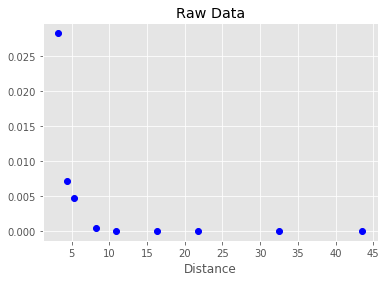

In [99]:
plt.title("Raw Data")
plt.xlabel("Distance")
plt.plot(data[:,0],data[:,1],'bo')

Since we expect the data to have an exponential decay, we can plot it using a semi-log plot.

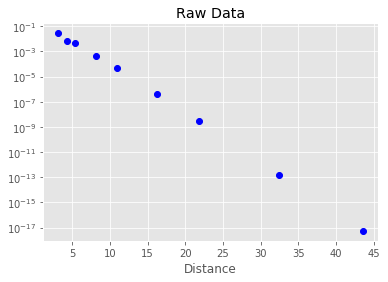

In [100]:
plt.title("Raw Data")
plt.xlabel("Distance")
plt.semilogy(data[:,0],data[:,1],'bo')

For a pure exponential decay like this, we can fit the log of the data to a straight line. The above plot suggests this is a good approximation. Given a function
$$ y = Ae^{-ax} $$
$$ \log(y) = \log(A) - ax$$
Thus, if we fit the log of the data versus x, we should get a straight line with slope $a$, and an intercept that gives the constant $A$.

There's a numpy function called **polyfit** that will fit data to a polynomial form. We'll use this to fit to a straight line (a polynomial of order 1)

In [101]:
params = sp.polyfit(data[:,0],np.log(data[:,1]),1)
a = params[0]
A = np.exp(params[1])

Let's see whether this curve fits the data.

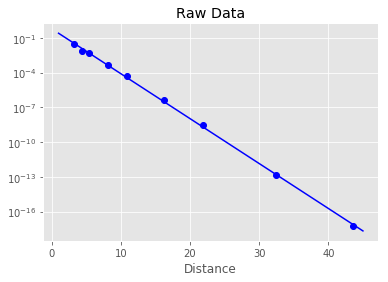

In [102]:
x = np.linspace(1,45)
plt.title("Raw Data")
plt.xlabel("Distance")
plt.semilogy(data[:,0],data[:,1],'bo')
plt.semilogy(x,A*np.exp(a*x),'b-')

If we have more complicated functions, we may not be able to get away with fitting to a simple polynomial. Consider the following data:

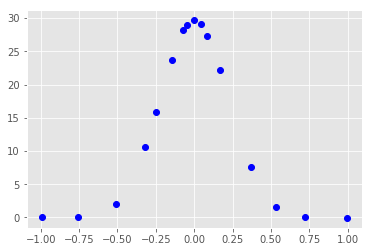

In [103]:
gauss_data = """\
-0.9902286902286903,1.4065274110372852e-19
-0.7566104566104566,2.2504438576596563e-18
-0.5117810117810118,1.9459459459459454
-0.31887271887271884,10.621621621621626
-0.250997150997151,15.891891891891893
-0.1463309463309464,23.756756756756754
-0.07267267267267263,28.135135135135133
-0.04426734426734419,29.02702702702703
-0.0015939015939017698,29.675675675675677
0.04689304689304685,29.10810810810811
0.0840994840994842,27.324324324324326
0.1700546700546699,22.216216216216214
0.370878570878571,7.540540540540545
0.5338338338338338,1.621621621621618
0.722014322014322,0.08108108108108068
0.9926849926849926,-0.08108108108108646"""

data = []
for line in gauss_data.splitlines():
    words = line.split(',')
    data.append(words)
data = np.array(data, dtype=np.float)

plt.plot(data[:,0],data[:,1],'bo')

This data looks more Gaussian than exponential. If we wanted to, we could use **polyfit** for this as well, but let's use the **curve_fit** function from Scipy, which can fit to arbitrary functions. You can learn more using help(curve_fit).

First define a general Gaussian function to fit to.

In [104]:
def gauss(x,A,a): 
    return A*np.exp(a*x**2)

Now fit to it using **curve_fit**:

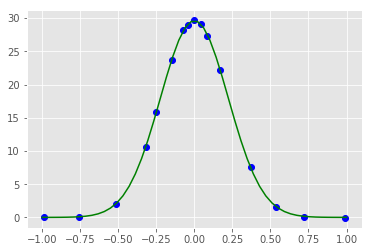

In [105]:
from scipy.optimize import curve_fit

params,conv = curve_fit(gauss,data[:,0],data[:,1])
x = np.linspace(-1,1)
plt.plot(data[:,0],data[:,1],'bo')
A,a = params
plt.plot(x,gauss(x,A,a),'g-')

The **curve_fit** routine we just used is built on top of a very good general **minimization** capability in Scipy. You can learn more [at the scipy documentation pages](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

## Monte Carlo and random numbers
Many methods in scientific computing rely on Monte Carlo integration, where a sequence of (pseudo) random numbers are used to approximate the integral of a function. Python has good random number generators in the standard library. The **random()** function gives pseudorandom numbers uniformly distributed between 0 and 1:

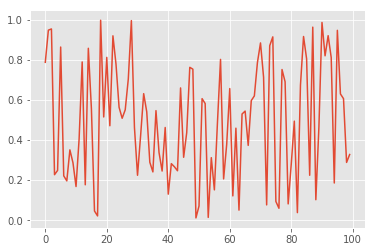

In [106]:
from random import random
rands = []
for i in range(100):
    rands.append(random())
plt.plot(rands)

**random()** uses the [Mersenne Twister](http://www.math.sci.hiroshima-u.ac.jp/~m-mat/MT/emt.html) algorithm, which is a highly regarded pseudorandom number generator. There are also functions to generate random integers, to randomly shuffle a list, and functions to pick random numbers from a particular distribution, like the normal distribution:

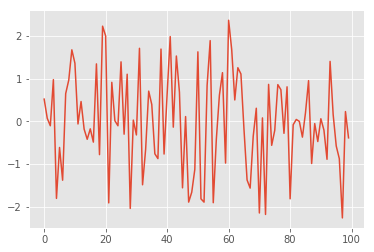

In [107]:
from random import gauss
grands = []
for i in range(100):
    grands.append(gauss(0,1))
plt.plot(grands)

It is generally more efficient to generate a list of random numbers all at once, particularly if you're drawing from a non-uniform distribution. Numpy has functions to generate vectors and matrices of particular types of random distributions.

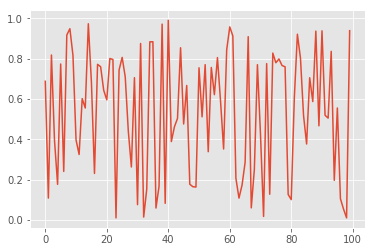

In [108]:
plt.plot(np.random.rand(100))

# III. Introduction to Pandas

In [109]:
import pandas as pd
import numpy as np

## Series

A Series is a one-dimensional array-like object containing an array of data and an associated array of data labels.  The data can be any NumPy data type and the labels are the Series' index.

Create a Series:

In [110]:
ser_1 = pd.Series([1, 1, 2, -3, -5, 8, 13])
ser_1

0     1
1     1
2     2
3    -3
4    -5
5     8
6    13
dtype: int64

Get the array representation of a Series:

In [111]:
ser_1.values

array([ 1,  1,  2, -3, -5,  8, 13])

Index objects are immutable and hold the axis labels and metadata such as names and axis names.

Get the index of the Series:

In [112]:
ser_1.index

RangeIndex(start=0, stop=7, step=1)

Create a Series with a custom index:

In [113]:
ser_2 = pd.Series([1, 1, 2, -3, -5], index=['a', 'b', 'c', 'd', 'e'])
ser_2

a    1
b    1
c    2
d   -3
e   -5
dtype: int64

Get a value from a Series:

In [114]:
ser_2[4] == ser_2['e']

True

Get a set of values from a Series by passing in a list:

In [115]:
ser_2[['c', 'a', 'b']]

c    2
a    1
b    1
dtype: int64

Get values great than 0:

In [116]:
ser_2[ser_2 > 0]

a    1
b    1
c    2
dtype: int64

Scalar multiply:

In [117]:
ser_2 * 2

a     2
b     2
c     4
d    -6
e   -10
dtype: int64

Apply a numpy math function:

In [118]:
np.exp(ser_2)

a    2.718282
b    2.718282
c    7.389056
d    0.049787
e    0.006738
dtype: float64

A Series is like a fixed-length, ordered dict.  

Create a series by passing in a dict:

In [119]:
dict_1 = {'foo' : 100, 'bar' : 200, 'baz' : 300}
ser_3 = pd.Series(dict_1)
ser_3

foo    100
bar    200
baz    300
dtype: int64

Re-order a Series by passing in an index (indices not found are NaN):

In [120]:
index = ['foo', 'bar', 'baz', 'qux']
ser_4 = pd.Series(dict_1, index=index)
ser_4

foo    100.0
bar    200.0
baz    300.0
qux      NaN
dtype: float64

Check for NaN with the pandas method:

In [121]:
pd.isnull(ser_4)

foo    False
bar    False
baz    False
qux     True
dtype: bool

Check for NaN with the Series method:

In [122]:
ser_4.isnull()

foo    False
bar    False
baz    False
qux     True
dtype: bool

Series automatically aligns differently indexed data in arithmetic operations:

In [123]:
ser_3 + ser_4

bar    400.0
baz    600.0
foo    200.0
qux      NaN
dtype: float64

Name a Series:

In [124]:
ser_4.name = 'foobarbazqux'

Name a Series index:

In [125]:
ser_4.index.name = 'label'

In [126]:
ser_4

label
foo    100.0
bar    200.0
baz    300.0
qux      NaN
Name: foobarbazqux, dtype: float64

Rename a Series' index in place:

In [127]:
ser_4.index = ['fo', 'br', 'bz', 'qx']
ser_4

fo    100.0
br    200.0
bz    300.0
qx      NaN
Name: foobarbazqux, dtype: float64

## DataFrame

A DataFrame is a tabular data structure containing an ordered collection of columns.  Each column can have a different type.  DataFrames have both row and column indices and is analogous to a dict of Series.  Row and column operations are treated roughly symmetrically.  Columns returned when indexing a DataFrame are views of the underlying data, not a copy.  To obtain a copy, use the Series' copy method.

Create a DataFrame:

In [128]:
data_1 = {'state' : ['VA', 'VA', 'VA', 'MD', 'MD'],
          'year' : [2012, 2013, 2014, 2014, 2015],
          'pop' : [5.0, 5.1, 5.2, 4.0, 4.1]}
df_1 = pd.DataFrame(data_1)
df_1

,state,year,pop
0,VA,2012,5.0
1,VA,2013,5.1
2,VA,2014,5.2
3,MD,2014,4.0
4,MD,2015,4.1


In [129]:
df_2 = pd.DataFrame(data_1, columns=['year', 'state', 'pop'])
df_2

,year,state,pop
0,2012,VA,5.0
1,2013,VA,5.1
2,2014,VA,5.2
3,2014,MD,4.0
4,2015,MD,4.1


Like Series, columns that are not present in the data are NaN:

In [130]:
df_3 = pd.DataFrame(data_1, columns=['year', 'state', 'pop', 'unempl'])
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,NaN
3,2014,MD,4.0,NaN
4,2015,MD,4.1,NaN


Retrieve a column by key, returning a Series:

In [131]:
df_3['state']

0    VA
1    VA
2    VA
3    MD
4    MD
Name: state, dtype: object

Retrive a column by attribute, returning a Series:

In [132]:
df_3.year

0    2012
1    2013
2    2014
3    2014
4    2015
Name: year, dtype: int64

Retrieve a row by position:

In [133]:
df_3.iloc[0]

year      2012
state       VA
pop          5
unempl     NaN
Name: 0, dtype: object

Update a column by assignment:

In [134]:
df_3['unempl'] = np.arange(5)
df_3

,year,state,pop,unempl
0,2012,VA,5.0,0
1,2013,VA,5.1,1
2,2014,VA,5.2,2
3,2014,MD,4.0,3
4,2015,MD,4.1,4


Assign a Series to a column (note if assigning a list or array, the length must match the DataFrame, unlike a Series):

In [135]:
unempl = pd.Series([6.0, 6.0, 6.1], index=[2, 3, 4])
df_3['unempl'] = unempl
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


Assign a new column that doesn't exist to create a new column:

In [136]:
df_3['state_dup'] = df_3['state']
df_3

,year,state,pop,unempl,state_dup
0,2012,VA,5.0,NaN,VA
1,2013,VA,5.1,NaN,VA
2,2014,VA,5.2,6.0,VA
3,2014,MD,4.0,6.0,MD
4,2015,MD,4.1,6.1,MD


Delete a column:

In [137]:
del df_3['state_dup']
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


Transpose the DataFrame:

In [138]:
df_3.T

,0,1,2,3,4
year,2012,2013,2014,2014,2015
state,VA,VA,VA,MD,MD
pop,5,5.1,5.2,4,4.1
unempl,NaN,NaN,6,6,6.1


Create a DataFrame from a nested dict of dicts (the keys in the inner dicts are unioned and sorted to form the index in the result, unless an explicit index is specified):

In [139]:
pop = {'VA' : {2013 : 5.1, 2014 : 5.2},
       'MD' : {2014 : 4.0, 2015 : 4.1}}
df_4 = pd.DataFrame(pop)
df_4

,VA,MD
2013,5.1,NaN
2014,5.2,4.0
2015,NaN,4.1


Create a DataFrame from a dict of Series:

In [140]:
data_2 = {'VA' : df_4['VA'][1:],
          'MD' : df_4['MD'][2:]}
df_5 = pd.DataFrame(data_2)
df_5

,VA,MD
2014,5.2,NaN
2015,NaN,4.1


Set the DataFrame index name:

In [141]:
df_5.index.name = 'year'
df_5

,VA,MD
year,,
2014,5.2,NaN
2015,NaN,4.1


Set the DataFrame columns name:

In [142]:
df_5.columns.name = 'state'
df_5

state,VA,MD
year,,
2014,5.2,NaN
2015,NaN,4.1


Return the data contained in a DataFrame as a 2D ndarray:

In [143]:
df_5.values

array([[5.2, nan],
       [nan, 4.1]])

If the columns are different dtypes, the 2D ndarray's dtype will accomodate all of the columns:

In [144]:
df_3.values

array([[2012, 'VA', 5.0, nan],
       [2013, 'VA', 5.1, nan],
       [2014, 'VA', 5.2, 6.0],
       [2014, 'MD', 4.0, 6.0],
       [2015, 'MD', 4.1, 6.1]], dtype=object)

## Reindexing

Create a new object with the data conformed to a new index.  Any missing values are set to NaN.

In [145]:
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


Reindexing rows returns a new frame with the specified index:

In [146]:
df_3.reindex(list(reversed(range(0, 6))))

,year,state,pop,unempl
5,NaN,NaN,NaN,NaN
4,2015.0,MD,4.1,6.1
3,2014.0,MD,4.0,6.0
2,2014.0,VA,5.2,6.0
1,2013.0,VA,5.1,NaN
0,2012.0,VA,5.0,NaN


Reindex columns:

In [147]:
df_3.reindex(columns=['state', 'pop', 'unempl', 'year'])

,state,pop,unempl,year
0,VA,5.0,NaN,2012
1,VA,5.1,NaN,2013
2,VA,5.2,6.0,2014
3,MD,4.0,6.0,2014
4,MD,4.1,6.1,2015


## Dropping Entries

Drop rows from a Series or DataFrame:

In [148]:
df_7 = df_3.drop([0, 1])
df_7

,year,state,pop,unempl
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


In [149]:
df_7 = df_7.drop('unempl', axis=1)
df_7

,year,state,pop
2,2014,VA,5.2
3,2014,MD,4.0
4,2015,MD,4.1


## Indexing, Selecting, Filtering

Pandas supports indexing into a DataFrame.

In [150]:
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


Select specified columns from a DataFrame:

In [151]:
df_3[['pop', 'unempl']]

,pop,unempl
0,5.0,NaN
1,5.1,NaN
2,5.2,6.0
3,4.0,6.0
4,4.1,6.1


Select a slice from a DataFrame:

In [152]:
df_3[:2]

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN


In [153]:
df_3.iloc[1:3]

,year,state,pop,unempl
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0


Select from a DataFrame based on a filter:

In [154]:
df_3[df_3['pop'] > 5]

,year,state,pop,unempl
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0


Select a slice of rows from a specific column of a DataFrame:

In [155]:
df_3.loc[0:2, 'pop']
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


## Arithmetic and Data Alignment

Adding DataFrame objects results in the union of index pairs for rows and columns if the pairs are not the same, resulting in NaN for indices that do not overlap:

In [156]:
np.random.seed(0)
df_8 = pd.DataFrame(np.random.rand(9).reshape((3, 3)),
                 columns=['a', 'b', 'c'])
df_8

,a,b,c
0,0.548814,0.715189,0.602763
1,0.544883,0.423655,0.645894
2,0.437587,0.891773,0.963663


In [157]:
np.random.seed(1)
df_9 = pd.DataFrame(np.random.rand(9).reshape((3, 3)),
                 columns=['b', 'c', 'd'])
df_9

,b,c,d
0,0.417022,0.720324,0.000114
1,0.302333,0.146756,0.092339
2,0.186260,0.345561,0.396767


In [158]:
df_8 + df_9

,a,b,c,d
0,NaN,1.132211,1.323088,NaN
1,NaN,0.725987,0.792650,NaN
2,NaN,1.078033,1.309223,NaN


Set a fill value instead of NaN for indices that do not overlap:

In [159]:
df_10 = df_8.add(df_9, fill_value=0)
df_10

,a,b,c,d
0,0.548814,1.132211,1.323088,0.000114
1,0.544883,0.725987,0.792650,0.092339
2,0.437587,1.078033,1.309223,0.396767


Like NumPy, pandas supports arithmetic operations between DataFrames and Series.

Match the index of the Series on the DataFrame's columns, broadcasting down the rows:

In [160]:
ser_8 = df_10.iloc[0]
df_11 = df_10 - ser_8
df_11

,a,b,c,d
0,0.000000,0.000000,0.000000,0.000000
1,-0.003930,-0.406224,-0.530438,0.092224
2,-0.111226,-0.054178,-0.013864,0.396653


Match the index of the Series on the DataFrame's columns, broadcasting down the rows and union the indices that do not match:

In [161]:
ser_9 = pd.Series(range(3), index=['a', 'd', 'e'])
ser_9

a    0
d    1
e    2
dtype: int64

In [162]:
df_11 - ser_9

,a,b,c,d,e
0,0.000000,NaN,NaN,-1.000000,NaN
1,-0.003930,NaN,NaN,-0.907776,NaN
2,-0.111226,NaN,NaN,-0.603347,NaN


## Function Application and Mapping

NumPy ufuncs (element-wise array methods) operate on pandas objects:

In [163]:
df_11 = np.abs(df_11)
df_11

,a,b,c,d
0,0.000000,0.000000,0.000000,0.000000
1,0.003930,0.406224,0.530438,0.092224
2,0.111226,0.054178,0.013864,0.396653


Apply a function on 1D arrays to each column:

In [164]:
df_11.apply(sum)

a    0.115157
b    0.460402
c    0.544302
d    0.488877
dtype: float64

Apply a function on 1D arrays to each row:

In [165]:
df_11.apply(sum, axis=1)

0    0.000000
1    1.032816
2    0.575922
dtype: float64

Apply an element-wise Python function to a DataFrame:

In [166]:
def func_3(x): 
    return '%.2f' %x
df_11.applymap(func_3)

,a,b,c,d
0,0.00,0.00,0.00,0.00
1,0.00,0.41,0.53,0.09
2,0.11,0.05,0.01,0.40


## Sorting

In [167]:
df_12 = pd.DataFrame(np.arange(12).reshape((3, 4)),
                  index=['three', 'one', 'two'],
                  columns=['c', 'a', 'b', 'd'])
df_12

,c,a,b,d
three,0,1,2,3
one,4,5,6,7
two,8,9,10,11


Sort a DataFrame by its index:

In [168]:
df_12.sort_index()

,c,a,b,d
one,4,5,6,7
three,0,1,2,3
two,8,9,10,11


Sort a DataFrame by columns in descending order:

In [169]:
df_12.sort_index(axis=1, ascending=False)

,d,c,b,a
three,3,0,2,1
one,7,4,6,5
two,11,8,10,9


Sort a DataFrame's values by column:

In [170]:
df_12.sort_values(by=['d', 'c'])

,c,a,b,d
three,0,1,2,3
one,4,5,6,7
two,8,9,10,11


## Summarizing and Computing Descriptive Statistics

Unlike NumPy arrays, Pandas descriptive statistics automatically exclude missing data.  NaN values are excluded unless the entire row or column is NA.

In [171]:
df_15 = pd.DataFrame(np.random.randn(10, 3),
                     columns=['a', 'b', 'c'])
df_15['cat1'] = (np.random.rand(10) * 3).round(0)
df_15['cat2'] = (np.random.rand(10)).round(0)
df_15

,a,b,c,cat1,cat2
0,-2.363469,1.135345,-1.017014,0.0,1.0
1,0.637362,-0.859907,1.772608,2.0,1.0
2,-1.110363,0.181214,0.564345,0.0,1.0
3,-0.566510,0.729976,0.372994,2.0,1.0
4,0.533811,-0.091973,1.913820,2.0,1.0
5,0.330797,1.141943,-1.129595,0.0,1.0
6,-0.850052,0.960820,-0.217418,1.0,0.0
7,0.158515,0.873418,-0.111383,2.0,0.0
8,-1.038039,-1.009480,-1.058257,1.0,1.0
9,0.656284,-0.062492,-1.738654,0.0,0.0


### Sum and Mean

In [172]:
df_15.sum()

a       -3.611664
b        2.998865
c       -0.648555
cat1    10.000000
cat2     7.000000
dtype: float64

In [173]:
df_15.sum(axis=1)

0   -1.245137
1    4.550063
2    0.635196
3    3.536459
4    5.355658
5    1.343144
6    0.893349
7    2.920550
8   -1.105775
9   -1.144862
dtype: float64

In [174]:
df_15.mean(axis=0)

a      -0.361166
b       0.299886
c      -0.064856
cat1    1.000000
cat2    0.700000
dtype: float64

### Descriptive analysis

In [175]:
df_15['a'].describe()

count    10.000000
mean     -0.361166
std       0.993980
min      -2.363469
25%      -0.991042
50%      -0.203998
75%       0.483057
max       0.656284
Name: a, dtype: float64

In [176]:
df_15['cat1'].value_counts()

2.0    4
0.0    4
1.0    2
Name: cat1, dtype: int64

## Pivot tables

### group by cat1 and calculate mean

In [177]:
pd.pivot_table(df_15, index='cat1', aggfunc=np.mean)

,a,b,c,cat2
cat1,,,,
0.0,-0.621688,0.599003,-0.830230,0.75
1.0,-0.944046,-0.024330,-0.637837,0.50
2.0,0.190794,0.162878,0.987010,0.75
